In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/TIMESERIES/group1_co2_monthly.csv"

df = pd.read_csv(path, index_col='index', parse_dates=True)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                   co2
index                 
1958-03-31  316.100000
1958-04-30  317.200000
1958-05-31  317.433333
1958-06-30  316.529167
1958-07-31  315.625000


/tmp/ipython-input-1127196919.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.index.freq = "M"


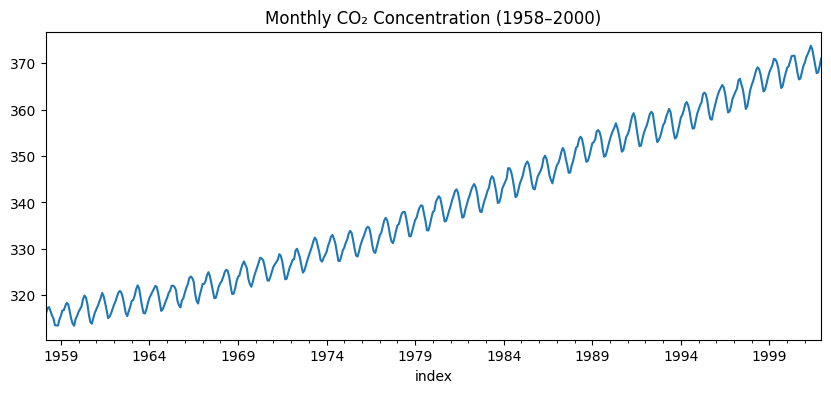

In [ ]:
df.index.freq = "M"
df['co2'].plot(figsize=(10, 4), title="Monthly CO₂ Concentration (1958–2000)")
plt.show()

# **Question 1**

In [ ]:
# Split train_test data (forecasting the last 12 months)
test_size = 12
train_size = len(df) - test_size

train = df.iloc[:train_size]
test = df.iloc[train_size:]

print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

Training set size: 514
Test set size: 12


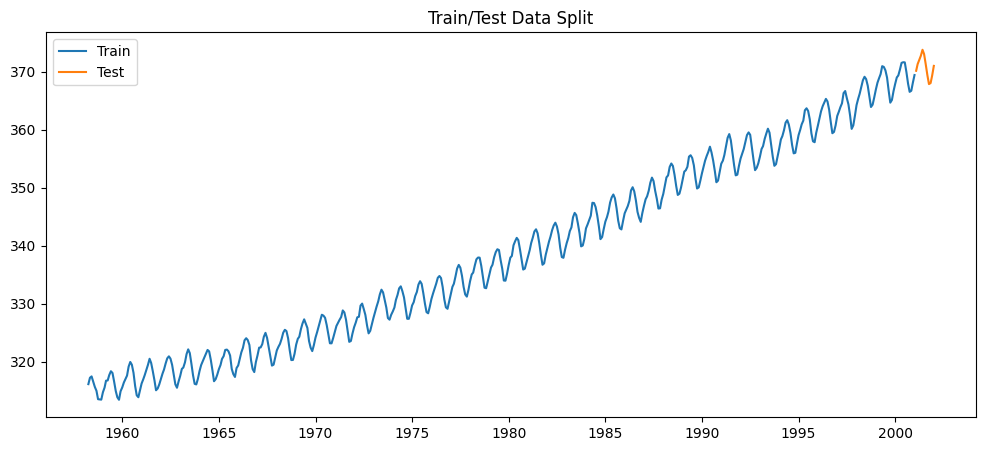

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train['co2'], label='Train')
plt.plot(test['co2'], label='Test')
plt.title("Train/Test Data Split")
plt.legend()
plt.show()

## 1.1 AR(1)

In [ ]:
model_ar1 = ARIMA(train['co2'], order=(1, 0, 0))
results_ar1 = model_ar1.fit()

In [ ]:
print(results_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  514
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -821.088
Date:                Tue, 06 Jan 2026   AIC                           1648.177
Time:                        10:22:39   BIC                           1660.903
Sample:                    03-31-1958   HQIC                          1653.165
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        338.8900     25.874     13.098      0.000     288.179     389.601
ar.L1          0.9989      0.003    311.572      0.000       0.993       1.005
sigma2         1.4122      0.142      9.957      0.0

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions_ar1 = results_ar1.predict(start=start, end=end, dynamic=False)

compare_df = pd.DataFrame({
    'Actual': test['co2'],
    'Predicted': predictions_ar1
})

compare_df['Error'] = compare_df['Actual'] - compare_df['Predicted']
print(compare_df)

             Actual   Predicted     Error
2001-01-31  370.175  369.406279  0.768721
2001-02-28  371.325  369.372594  1.952406
2001-03-31  372.060  369.338947  2.721053
2001-04-30  372.775  369.305338  3.469662
2001-05-31  373.800  369.271765  4.528235
2001-06-30  373.060  369.238229  3.821771
2001-07-31  371.300  369.204730  2.095270
2001-08-31  369.425  369.171269  0.253731
2001-09-30  367.880  369.137844 -1.257844
2001-10-31  368.050  369.104456 -1.054456
2001-11-30  369.375  369.071105  0.303895
2001-12-31  371.020  369.037791  1.982209


In [ ]:
# RMSE and MAPE
rmse_ar1 = np.sqrt(mean_squared_error(test['co2'], predictions_ar1))
mape_ar1 = mean_absolute_percentage_error(test['co2'], predictions_ar1)

print(f"RMSE (Root Mean Squared Erro): {rmse_ar1:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape_ar1 * 100:.4f}%")

RMSE (Root Mean Squared Erro): 2.4174
MAPE (Mean Absolute Percentage Error): 0.5424%


## 1.2 ARMA(1,1)

In [ ]:
model_arma11 = ARIMA(train['co2'], order=(1, 0, 1))
results_arma11 = model_arma11.fit()

print(results_arma11.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  514
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -667.679
Date:                Tue, 06 Jan 2026   AIC                           1343.358
Time:                        10:22:40   BIC                           1360.327
Sample:                    03-31-1958   HQIC                          1350.008
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        339.2916     18.022     18.826      0.000     303.968     374.615
ar.L1          0.9979      0.004    254.682      0.000       0.990       1.006
ma.L1          0.6571      0.035     18.521      0.0

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions_arma11 = results_arma11.predict(start=start, end=end, dynamic=False)

compare_arma_df = pd.DataFrame({
    'Actual': test['co2'],
    'Predicted': predictions_arma11
})

compare_arma_df['Error'] = compare_arma_df['Actual'] - compare_arma_df['Predicted']
print(compare_arma_df)

             Actual   Predicted     Error
2001-01-31  370.175  369.872950  0.302050
2001-02-28  371.325  369.808679  1.516321
2001-03-31  372.060  369.744544  2.315456
2001-04-30  372.775  369.680543  3.094457
2001-05-31  373.800  369.616677  4.183323
2001-06-30  373.060  369.552945  3.507055
2001-07-31  371.300  369.489347  1.810653
2001-08-31  369.425  369.425882 -0.000882
2001-09-30  367.880  369.362551 -1.482551
2001-10-31  368.050  369.299354 -1.249354
2001-11-30  369.375  369.236288  0.138712
2001-12-31  371.020  369.173356  1.846644


In [ ]:
# RMSE and MAPE
rmse_arma11 = np.sqrt(mean_squared_error(test['co2'], predictions_arma11))
mape_arma11 = mean_absolute_percentage_error(test['co2'], predictions_arma11)

print(f"RMSE (Root Mean Squared Error): {rmse_arma11:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape_arma11 * 100:.4f}%")

RMSE (Root Mean Squared Error): 2.1908
MAPE (Mean Absolute Percentage Error): 0.4806%


## 1.3 Compare AR(1) with ARMA(1,1)

In [ ]:
comparison_metrics = pd.DataFrame({
    'Model': ['AR(1)', 'ARMA(1,1)'],
    'RMSE': [rmse_ar1, rmse_arma11],
    'MAPE (%)': [mape_ar1 * 100, mape_arma11 * 100]
})
print(comparison_metrics)

       Model      RMSE  MAPE (%)
0      AR(1)  2.417410  0.542446
1  ARMA(1,1)  2.190771  0.480602


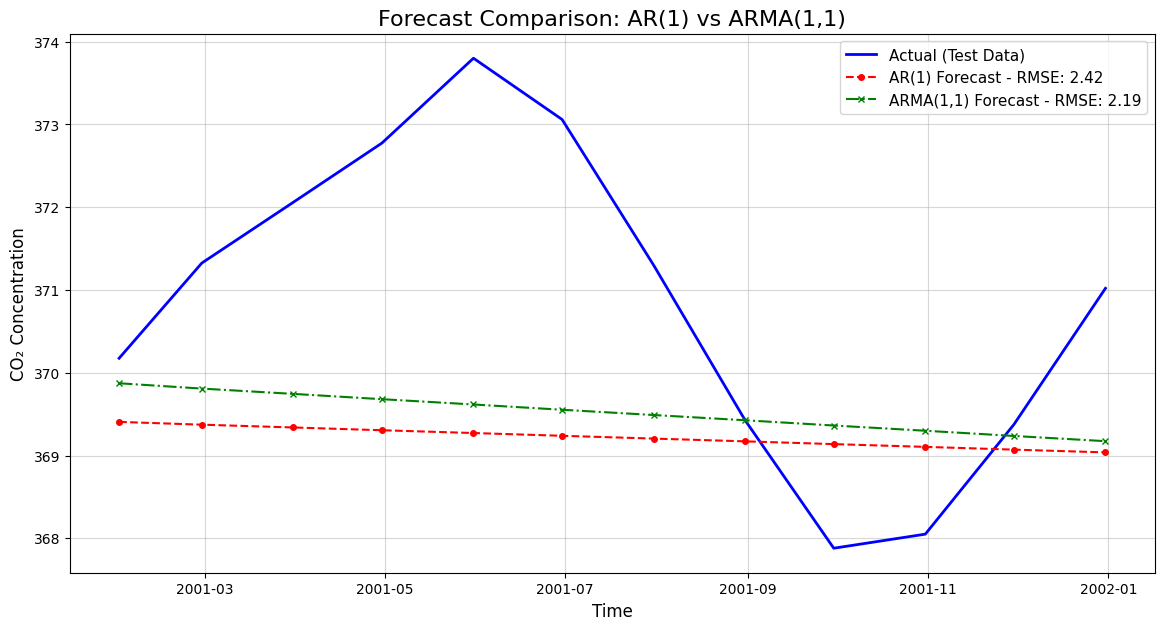

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['co2'], label='Actual (Test Data)', color='blue', linewidth=2)

# AR(1)
plt.plot(test.index, predictions_ar1, label=f'AR(1) Forecast - RMSE: {rmse_ar1:.2f}',
         color='red', linestyle='--', marker='o', markersize=4)

# ARMA(1,1)
plt.plot(test.index, predictions_arma11, label=f'ARMA(1,1) Forecast - RMSE: {rmse_arma11:.2f}',
         color='green', linestyle='-.', marker='x', markersize=4)

plt.title('Forecast Comparison: AR(1) vs ARMA(1,1)', fontsize=16)
plt.ylabel('CO₂ Concentration', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.5)

plt.show()

# **Question 2**

Use full dataset (df) to train the model

## 2.1 AR(1)

In [ ]:
model_full_ar = ARIMA(df['co2'], order=(1, 0, 0))
results_full_ar = model_full_ar.fit()

print(results_full_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -840.599
Date:                Tue, 06 Jan 2026   AIC                           1687.198
Time:                        10:22:40   BIC                           1699.994
Sample:                    03-31-1958   HQIC                          1692.208
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        339.6192     27.710     12.256      0.000     285.308     393.930
ar.L1          0.9990      0.003    323.789      0.000       0.993       1.005
sigma2         1.4142      0.141     10.039      0.0

In [ ]:
forecast_result = results_full_ar.get_forecast(steps=1)
y_pred_value = forecast_result.predicted_mean.iloc[0]

print(f"Point Forecast: {y_pred_value:.4f}")

Point Forecast: 370.9881


In [ ]:
conf_int_df = forecast_result.conf_int()
lower_bound = conf_int_df.iloc[0, 0]
upper_bound = conf_int_df.iloc[0, 1]

print(f"Lower bound (95% CI): {lower_bound:.4f}")
print(f"Upper bound (95% CI): {upper_bound:.4f}")
print(f"Confidence interval width (+/-): {(upper_bound - lower_bound)/2:.4f}")

Lower bound (95% CI): 368.6574
Upper bound (95% CI): 373.3189
Confidence interval width (+/-): 2.3308


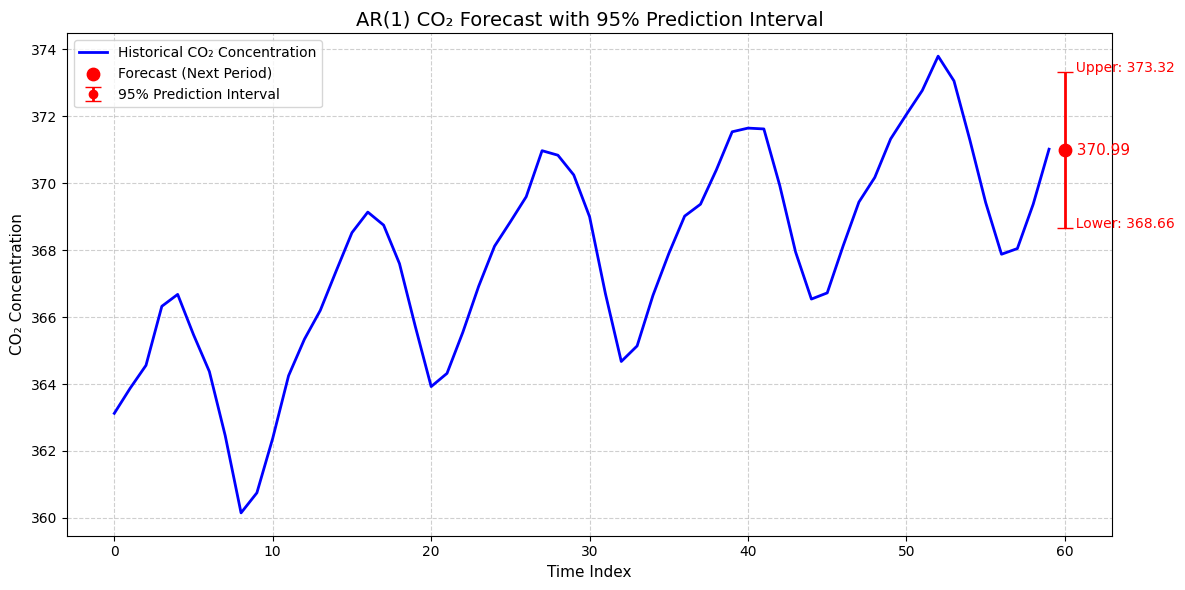

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_history = 60

historical_data = df['co2'].iloc[-n_history:]
x_hist = np.arange(len(historical_data))

x_forecast = len(historical_data)

plt.figure(figsize=(12, 6))

plt.plot(
    x_hist,
    historical_data.values,
    label='Historical CO₂ Concentration',
    color='blue',
    linewidth=2
)

plt.scatter(
    x_forecast,
    y_pred_value,
    color='red',
    s=80,
    zorder=5,
    label='Forecast (Next Period)'
)

plt.errorbar(
    x_forecast,
    y_pred_value,
    yerr=[[y_pred_value - lower_bound], [upper_bound - y_pred_value]],
    fmt='o',
    color='red',
    ecolor='red',
    elinewidth=2,
    capsize=6,
    label='95% Prediction Interval'
)

plt.text(
    x_forecast + 0.15,
    y_pred_value,
    f'  {y_pred_value:.2f}',
    color='red',
    fontsize=11,
    verticalalignment='center'
)

plt.text(
    x_forecast + 0.15,
    upper_bound,
    f'  Upper: {upper_bound:.2f}',
    color='red',
    fontsize=10
)

plt.text(
    x_forecast + 0.15,
    lower_bound,
    f'  Lower: {lower_bound:.2f}',
    color='red',
    fontsize=10
)

plt.title('AR(1) CO₂ Forecast with 95% Prediction Interval', fontsize=14)
plt.xlabel('Time Index', fontsize=11)
plt.ylabel('CO₂ Concentration', fontsize=11)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2.2 ARMA(1,1)

In [ ]:
model_full_arma = ARIMA(df['co2'], order=(1, 0, 1))
results_full_arma = model_full_arma.fit()

print(results_full_arma.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -682.707
Date:                Tue, 06 Jan 2026   AIC                           1373.414
Time:                        10:22:42   BIC                           1390.475
Sample:                    03-31-1958   HQIC                          1380.094
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        340.0583     18.954     17.941      0.000     302.909     377.208
ar.L1          0.9981      0.004    264.076      0.000       0.991       1.005
ma.L1          0.6602      0.035     18.910      0.0

In [ ]:
forecast_result_arma = results_full_arma.get_forecast(steps=1)

y_pred_value_arma = forecast_result_arma.predicted_mean.iloc[0]
print(f"Point Forecast: {y_pred_value_arma:.4f}")

Point Forecast: 371.6825


In [ ]:
conf_int_df_arma = forecast_result_arma.conf_int()
lower_bound_arma = conf_int_df_arma.iloc[0, 0]
upper_bound_arma = conf_int_df_arma.iloc[0, 1]

print(f"Lower bound (95% CI): {lower_bound_arma:.4f}")
print(f"Upper bound (95% CI): {upper_bound_arma:.4f}")
print(f"Confidence interval width (+/-): {(upper_bound_arma - lower_bound_arma):.4f}")

Lower bound (95% CI): 369.9577
Upper bound (95% CI): 373.4073
Confidence interval width (+/-): 3.4497


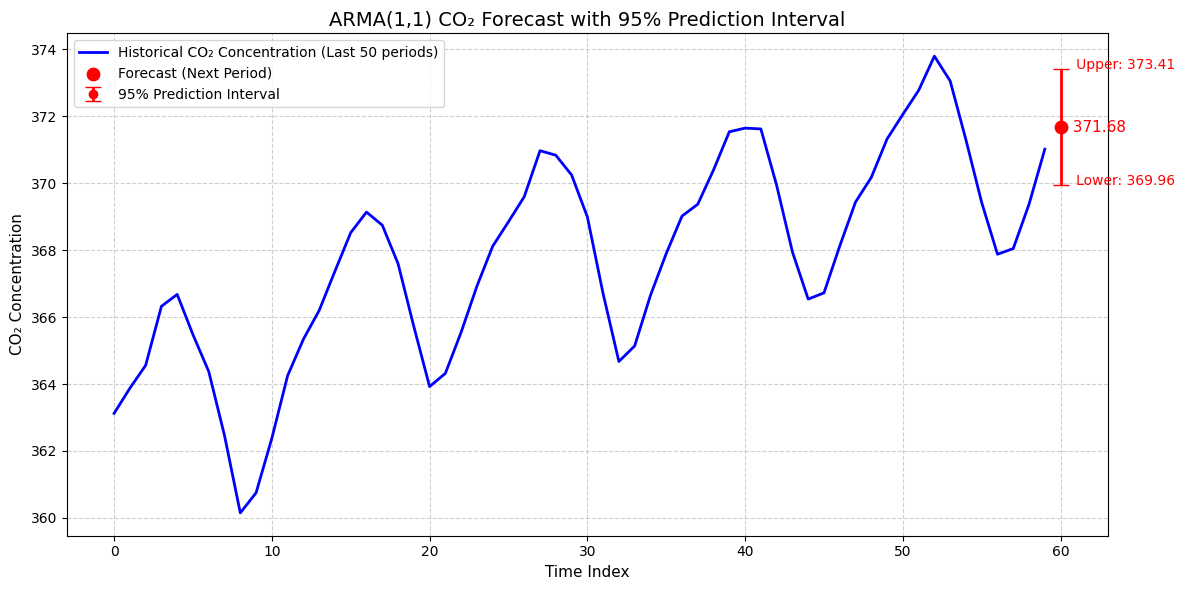

In [ ]:
n_history = 60

historical_data = df['co2'].iloc[-n_history:]
x_hist = np.arange(len(historical_data))

x_forecast = len(historical_data)

plt.figure(figsize=(12, 6))

plt.plot(
    x_hist,
    historical_data.values,
    label='Historical CO₂ Concentration (Last 50 periods)',
    color='blue',
    linewidth=2
)

plt.scatter(
    x_forecast,
    y_pred_value_arma,
    color='red',
    s=80,
    zorder=5,
    label='Forecast (Next Period)'
)

plt.errorbar(
    x_forecast,
    y_pred_value_arma,
    yerr=[[y_pred_value_arma - lower_bound_arma],
          [upper_bound_arma - y_pred_value_arma]],
    fmt='o',
    color='red',
    ecolor='red',
    elinewidth=2,
    capsize=6,
    label='95% Prediction Interval'
)

plt.text(
    x_forecast + 0.15,
    y_pred_value_arma,
    f'  {y_pred_value_arma:.2f}',
    color='red',
    fontsize=11,
    verticalalignment='center'
)

plt.text(
    x_forecast + 0.15,
    upper_bound_arma,
    f'   Upper: {upper_bound_arma:.2f}',
    color='red',
    fontsize=10
)

plt.text(
    x_forecast + 0.15,
    lower_bound_arma,
    f'   Lower: {lower_bound_arma:.2f}',
    color='red',
    fontsize=10
)

plt.title('ARMA(1,1) CO₂ Forecast with 95% Prediction Interval', fontsize=14)
plt.xlabel('Time Index', fontsize=11)
plt.ylabel('CO₂ Concentration', fontsize=11)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Question 3**

In [ ]:
# Train the AR(1) model with full dataset
model_full_ar = ARIMA(df['co2'], order=(1, 0, 0))
results_full_ar = model_full_ar.fit()

In [ ]:
# Residuals
residuals = results_full_ar.resid

### Assumption 1: Zero mean and constant variance of errors

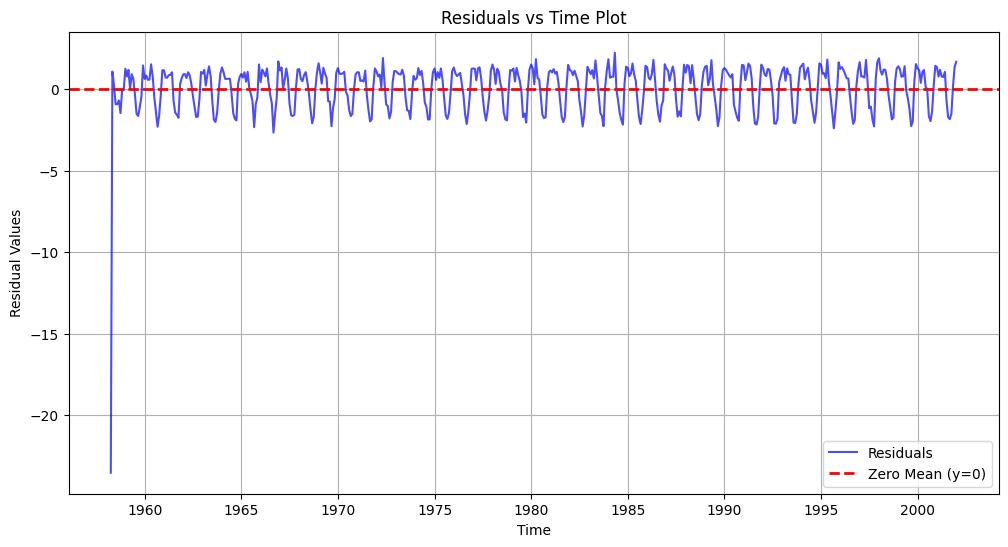

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue', alpha=0.7)

plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Mean (y=0)')

plt.title('Residuals vs Time Plot')
plt.xlabel('Time')
plt.ylabel('Residual Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
resid_mean = residuals.mean()
resid_std = residuals.std()

print(f"Mean of residuals: {resid_mean:.4f}")
print(f"Standard deviation (Std) of residuals: {resid_std:.4f}")

Mean of residuals: 0.0596
Standard deviation (Std) of residuals: 1.5700


### Assumption 2: Normality

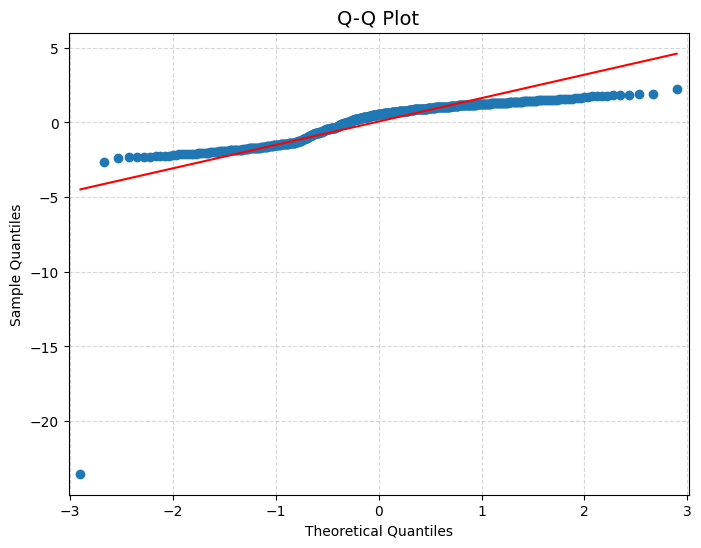

In [ ]:
residuals = results_full_ar.resid
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)

plt.title('Q-Q Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
shapiro_stat = shapiro_test[0]
p_value = shapiro_test[1]

print(f"Statistic: {shapiro_stat:.4f}")
print(f"p-value: {p_value:.6f}")

Statistic: 0.6465
p-value: 0.000000


### Assumption 3: No autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

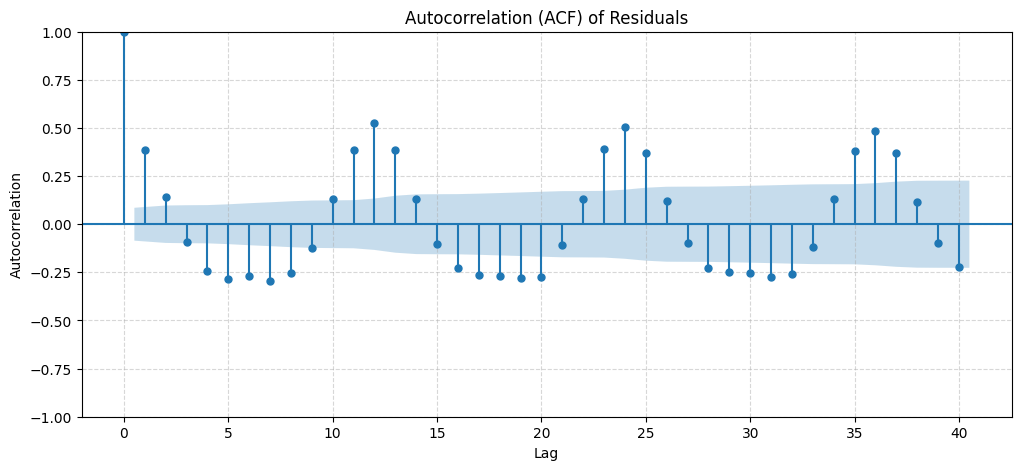

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(residuals, lags=40, ax=ax, title='Autocorrelation (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Ljung-Box
lb_test = acorr_ljungbox(residuals, lags=[12, 24, 36], return_df=True)

print(lb_test)

        lb_stat      lb_pvalue
12   534.338172  1.078607e-106
24  1061.716054  6.822928e-209
36  1563.053696  1.681585e-305
